# Loading the libraries

In [85]:
import numpy as np 

import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

import string

import os

import cv2

from sklearn.utils import shuffle

import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot


* **Preparing the data generator**

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Normalizing the data before feeding to model**

In [17]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

**Loading data as 28 * 28 grayscale images**

In [18]:
train_generator = train_datagen.flow_from_directory(
    './Train/',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    './Train/',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    './Test/',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


# Class Labels
**24 classes excluding J and Z**

In [19]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

**Visualizing the dataset**

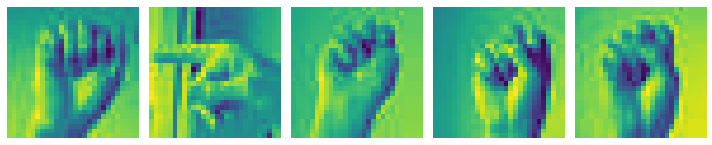

In [21]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

# **Preparing the CNN model**

**Create optimizers**

In [22]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
rmsprob = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,name="RMSprop")
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)

**A small network of single convolution and 3 Dense layers**

In [23]:
def learn(opt):
  model = Models.Sequential()

  model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(Layers.MaxPool2D(2,2))
  model.add(Layers.Flatten())
  model.add(Layers.Dense(256,activation='relu'))
  model.add(Layers.Dense(256,activation='relu'))
  model.add(Layers.Dropout(rate=0.5))
  model.add(Layers.Dense(len(classes), activation = "softmax"))

  model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


  return model

In [24]:
optimizer_list = {'sgd':sgd, 'rmsprob':rmsprob, 'adam':adam,'adamax':adamax}
models=[]
for opt in optimizer_list:
  models.append([opt, learn(optimizer_list[opt])])

Epoch 1/10
172/172 [==============================] - 6s 33ms/step - loss: 1.3026 - accuracy: 0.5804 - val_loss: 1.0204 - val_accuracy: 0.7298
Epoch 2/10
172/172 [==============================] - 6s 32ms/step - loss: 1.1989 - accuracy: 0.6120 - val_loss: 0.9606 - val_accuracy: 0.7236
Epoch 3/10
172/172 [==============================] - 5s 32ms/step - loss: 1.1084 - accuracy: 0.6417 - val_loss: 0.8763 - val_accuracy: 0.7511
Epoch 4/10
172/172 [==============================] - 5s 32ms/step - loss: 1.0392 - accuracy: 0.6631 - val_loss: 0.8183 - val_accuracy: 0.7739
Epoch 5/10
172/172 [==============================] - 5s 31ms/step - loss: 0.9736 - accuracy: 0.6819 - val_loss: 0.7603 - val_accuracy: 0.7913
Epoch 6/10
172/172 [==============================] - 6s 32ms/step - loss: 0.9148 - accuracy: 0.7023 - val_loss: 0.7056 - val_accuracy: 0.8123
Epoch 7/10
172/172 [==============================] - 6s 32ms/step - loss: 0.8631 - accuracy: 0.7210 - val_loss: 0.6760 - val_accuracy: 0.8227

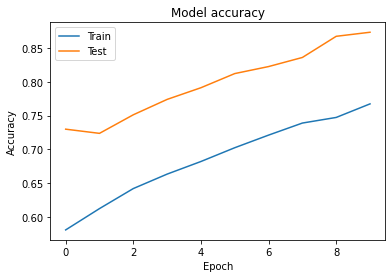

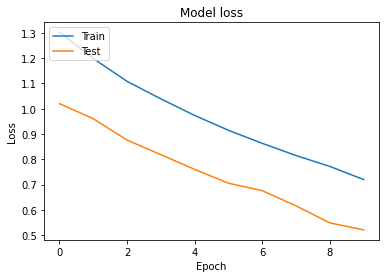

Epoch 1/10
172/172 [==============================] - 6s 33ms/step - loss: 2.1074 - accuracy: 0.3627 - val_loss: 0.8594 - val_accuracy: 0.7692
Epoch 2/10
172/172 [==============================] - 6s 33ms/step - loss: 0.6363 - accuracy: 0.7987 - val_loss: 0.2688 - val_accuracy: 0.9381
Epoch 3/10
172/172 [==============================] - 6s 33ms/step - loss: 0.1959 - accuracy: 0.9447 - val_loss: 0.0573 - val_accuracy: 0.9878
Epoch 4/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0623 - accuracy: 0.9852 - val_loss: 0.0144 - val_accuracy: 0.9987
Epoch 5/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0244 - accuracy: 0.9950 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0137 - val_accuracy: 0.9936

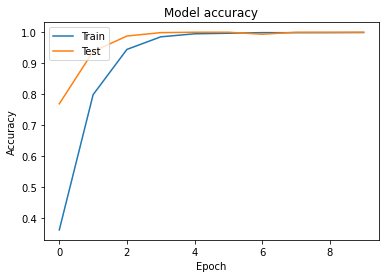

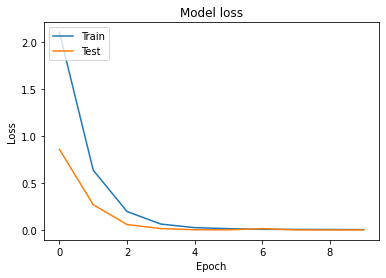

Epoch 1/10
172/172 [==============================] - 6s 33ms/step - loss: 2.1789 - accuracy: 0.3271 - val_loss: 0.8871 - val_accuracy: 0.7677
Epoch 2/10
172/172 [==============================] - 6s 33ms/step - loss: 0.6709 - accuracy: 0.7842 - val_loss: 0.2756 - val_accuracy: 0.9329
Epoch 3/10
172/172 [==============================] - 6s 33ms/step - loss: 0.2775 - accuracy: 0.9156 - val_loss: 0.1074 - val_accuracy: 0.9839
Epoch 4/10
172/172 [==============================] - 6s 33ms/step - loss: 0.1295 - accuracy: 0.9668 - val_loss: 0.0351 - val_accuracy: 0.9978
Epoch 5/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0674 - accuracy: 0.9856 - val_loss: 0.0199 - val_accuracy: 0.9976
Epoch 6/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0397 - accuracy: 0.9932 - val_loss: 0.0105 - val_accuracy: 0.9995
Epoch 7/10
172/172 [==============================] - 6s 33ms/step - loss: 0.0283 - accuracy: 0.9950 - val_loss: 0.0064 - val_accuracy: 0.9996

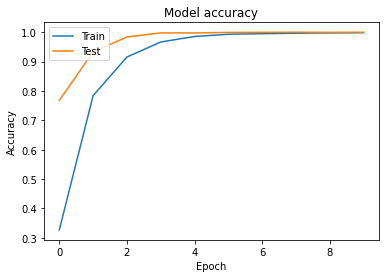

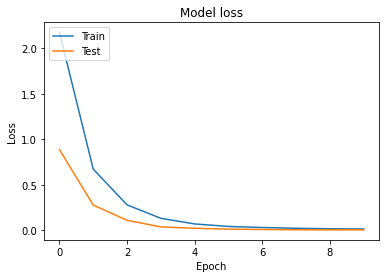

Epoch 1/10
172/172 [==============================] - 6s 34ms/step - loss: 2.7140 - accuracy: 0.2073 - val_loss: 1.8133 - val_accuracy: 0.5806
Epoch 2/10
172/172 [==============================] - 6s 33ms/step - loss: 1.5586 - accuracy: 0.5123 - val_loss: 0.9812 - val_accuracy: 0.7637
Epoch 3/10
172/172 [==============================] - 6s 33ms/step - loss: 0.9900 - accuracy: 0.6889 - val_loss: 0.6549 - val_accuracy: 0.8382
Epoch 4/10
172/172 [==============================] - 6s 33ms/step - loss: 0.6966 - accuracy: 0.7801 - val_loss: 0.4221 - val_accuracy: 0.8987
Epoch 5/10
172/172 [==============================] - 6s 33ms/step - loss: 0.5000 - accuracy: 0.8456 - val_loss: 0.2993 - val_accuracy: 0.9365
Epoch 6/10
172/172 [==============================] - 6s 33ms/step - loss: 0.3556 - accuracy: 0.8977 - val_loss: 0.1896 - val_accuracy: 0.9639
Epoch 7/10
172/172 [==============================] - 6s 33ms/step - loss: 0.2614 - accuracy: 0.9263 - val_loss: 0.1246 - val_accuracy: 0.9805

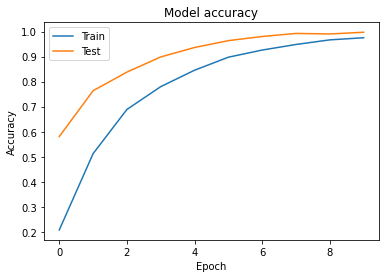

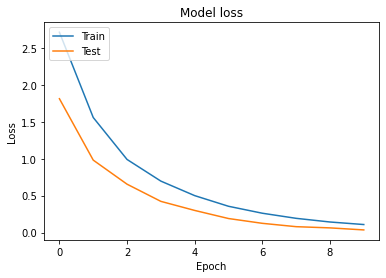

In [28]:
for model in models:
  trained = model[1].fit(train_generator,epochs=10,validation_data = validation_generator)
  print('optimizer:',model[0])
  plot.plot(trained.history['accuracy'])
  plot.plot(trained.history['val_accuracy'])
  plot.title('Model accuracy')
  plot.ylabel('Accuracy')
  plot.xlabel('Epoch')
  plot.legend(['Train', 'Test'], loc='upper left')
  plot.show()

  plot.plot(trained.history['loss'])
  plot.plot(trained.history['val_loss'])
  plot.title('Model loss')
  plot.ylabel('Loss')
  plot.xlabel('Epoch')
  plot.legend(['Train', 'Test'], loc='upper left')
  plot.show()

# **Evaluating**
**Testing the model on unseen dataset of 7k images**

In [30]:
for model in models:
  print(model[0])
  model[1].evaluate(test_generator, verbose=1)
  print('\n\n')

sgd
57/57 [==============================] - 2s 26ms/step - loss: 0.8697 - accuracy: 0.7313



rmsprob
57/57 [==============================] - 1s 24ms/step - loss: 0.9481 - accuracy: 0.8600



adam
57/57 [==============================] - 1s 24ms/step - loss: 0.7581 - accuracy: 0.8298



adamax
57/57 [==============================] - 1s 24ms/step - loss: 0.5677 - accuracy: 0.8399





# **Predicting**
**Randomly choose an alphabet from folder and display its prediction**

In [50]:
from random import randint
import cv2 as cv

def testModel(alphabet):
    dirname, _, filenames = list(os.walk(f'./Test/{alphabet.upper()}'))[0]
    img_path = os.path.join(dirname, filenames[randint(0, len(filenames))])
    print(img_path)
    img = cv.imread(img_path, 0).reshape(1, 28, 28, 1)
    for model in models:
      pred = model[1].predict(img)
      pred_label = classes[np.argmax(pred)]

      plt.figure()
      plt.title(pred_label)
      plt.ylabel(model[0])
      plt.imshow(img[0,:,:,0], cmap = "gray")

./Test/C/2155_C.jpg


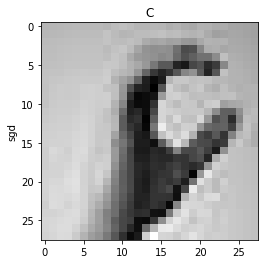

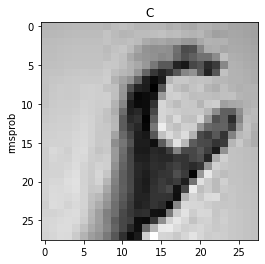

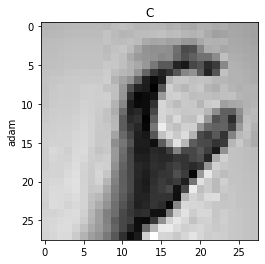

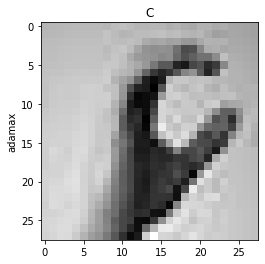

In [57]:
testModel("C")

./Test/M/6924_M.jpg


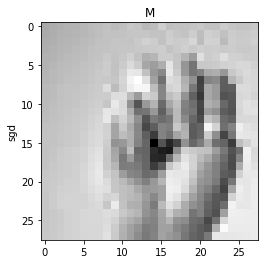

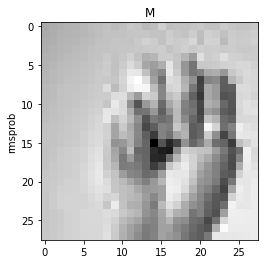

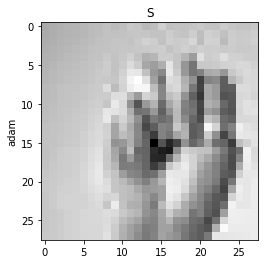

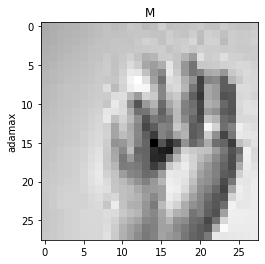

In [58]:
testModel("M")